In [66]:
import pandas as pd
import joblib

# Load dataset
data = pd.read_csv("heartData.csv")

# Load model, encoder, scaler
rf_model = joblib.load("heart_disease_rf_model.pkl")
encoder = joblib.load("encoder.pkl")

print("Files loaded successfully ✅")


Files loaded successfully ✅


In [67]:
import pandas as pd

df = pd.read_csv("/Users/harshkumar404/Documents/Heart-Disease-Predictor/heart/heartData.csv")

In [68]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,0,145,233,1,2,150,0,2.3,2,0,2,0
1,67,1,3,160,286,0,2,108,1,1.5,1,3,1,1
2,67,1,3,120,229,0,2,129,1,2.6,1,2,3,1
3,37,1,2,130,250,0,0,187,0,3.5,2,0,1,0
4,41,0,1,130,204,0,2,172,0,1.4,0,0,1,0


In [69]:
print(df.columns)
print(df.head())

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   63    1   0       145   233    1        2      150      0      2.3      2   
1   67    1   3       160   286    0        2      108      1      1.5      1   
2   67    1   3       120   229    0        2      129      1      2.6      1   
3   37    1   2       130   250    0        0      187      0      3.5      2   
4   41    0   1       130   204    0        2      172      0      1.4      0   

   ca  thal  target  
0   0     2       0  
1   3     1       1  
2   2     3       1  
3   0     1       0  
4   0     1       0  


In [70]:
X = df.drop("target", axis=1)  # Features
y = df["target"]               # Target


In [71]:
from sklearn.preprocessing import OneHotEncoder

# First, check which columns actually exist in your DataFrame
print("Available columns:", X.columns.tolist())

# Adjust the categorical_cols list to only include columns that exist in your DataFrame
# For example, if only 'restecg' and 'ca' exist:
categorical_cols = ['restecg', 'ca']  # Removed 'cp', 'slope', 'thal' which don't exist

# Make sure the categorical_cols list is not empty
if categorical_cols:
    # Using sparse_output instead of sparse in newer scikit-learn versions
    encoder = OneHotEncoder(drop='first', sparse_output=False)
    encoder.fit(X[categorical_cols])
else:
    print("No valid categorical columns found in the DataFrame")

Available columns: ['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']


In [72]:
import matplotlib.pyplot as plt
import seaborn as sns

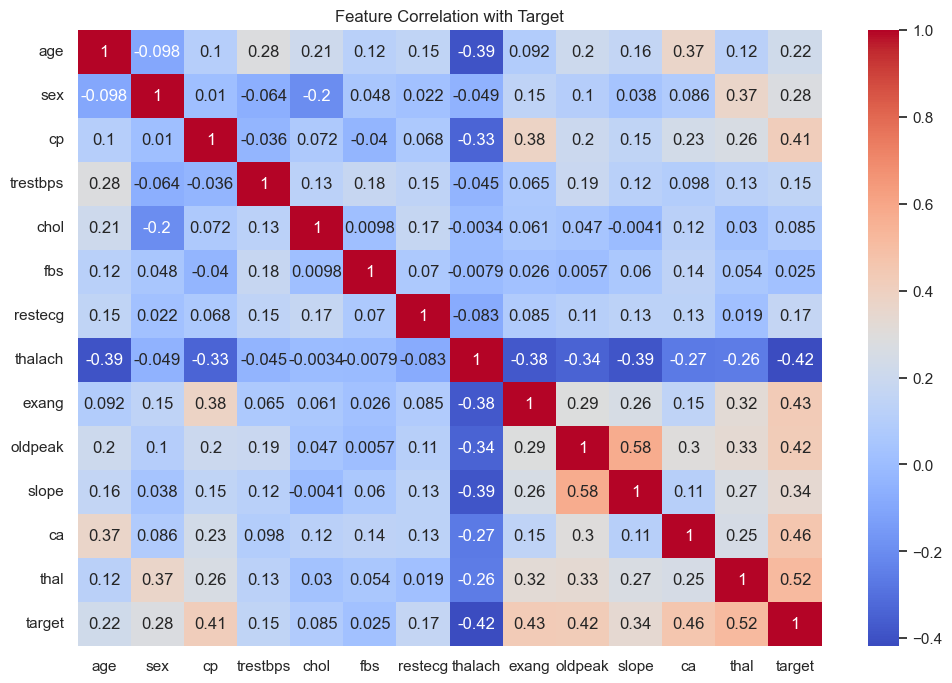

In [73]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm")
plt.title("Feature Correlation with Target")
plt.show()

In [74]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

print(feature_importance)


     feature  importance
7    thalach    0.127391
2         cp    0.124785
11        ca    0.117404
12      thal    0.114945
9    oldpeak    0.100558
0        age    0.089233
4       chol    0.081158
3   trestbps    0.070821
8      exang    0.062143
10     slope    0.047150
1        sex    0.033281
6    restecg    0.019975
5        fbs    0.011155


In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")


/var/folders/9n/xcvgzg393650ht1tb8d5p0wh0000gn/T/ipykernel_922/237998224.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="target", data=df, palette="viridis")


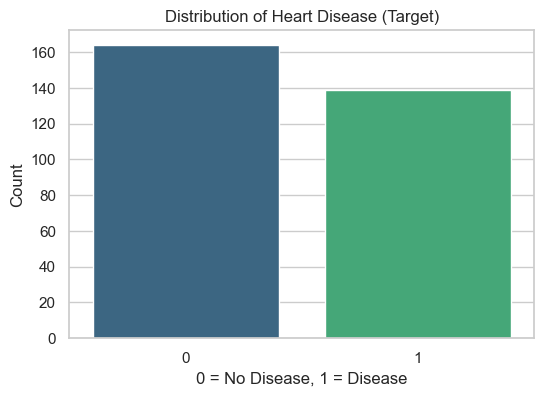

In [76]:
plt.figure(figsize=(6,4))
sns.countplot(x="target", data=df, palette="viridis")
plt.title("Distribution of Heart Disease (Target)")
plt.xlabel("0 = No Disease, 1 = Disease")
plt.ylabel("Count")
plt.show()


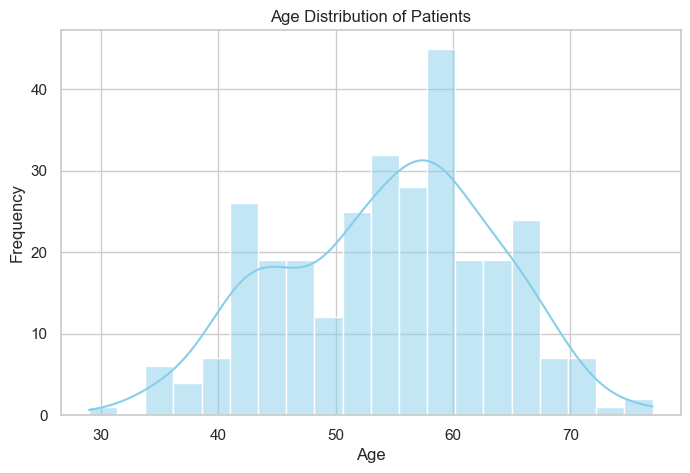

In [77]:
plt.figure(figsize=(8,5))
sns.histplot(df["age"], bins=20, kde=True, color="skyblue")
plt.title("Age Distribution of Patients")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()


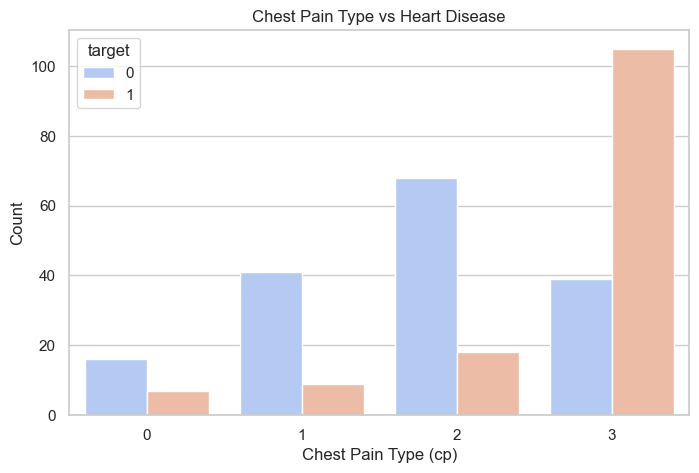

In [78]:
plt.figure(figsize=(8,5))
sns.countplot(x="cp", hue="target", data=df, palette="coolwarm")
plt.title("Chest Pain Type vs Heart Disease")
plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.show()


/var/folders/9n/xcvgzg393650ht1tb8d5p0wh0000gn/T/ipykernel_922/23911899.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="target", y="thalach", data=df, palette="Set2")


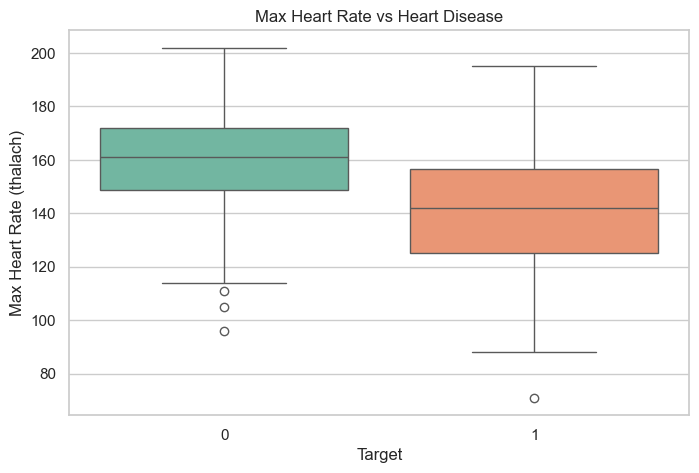

In [79]:
plt.figure(figsize=(8,5))
sns.boxplot(x="target", y="thalach", data=df, palette="Set2")
plt.title("Max Heart Rate vs Heart Disease")
plt.xlabel("Target")
plt.ylabel("Max Heart Rate (thalach)")
plt.show()


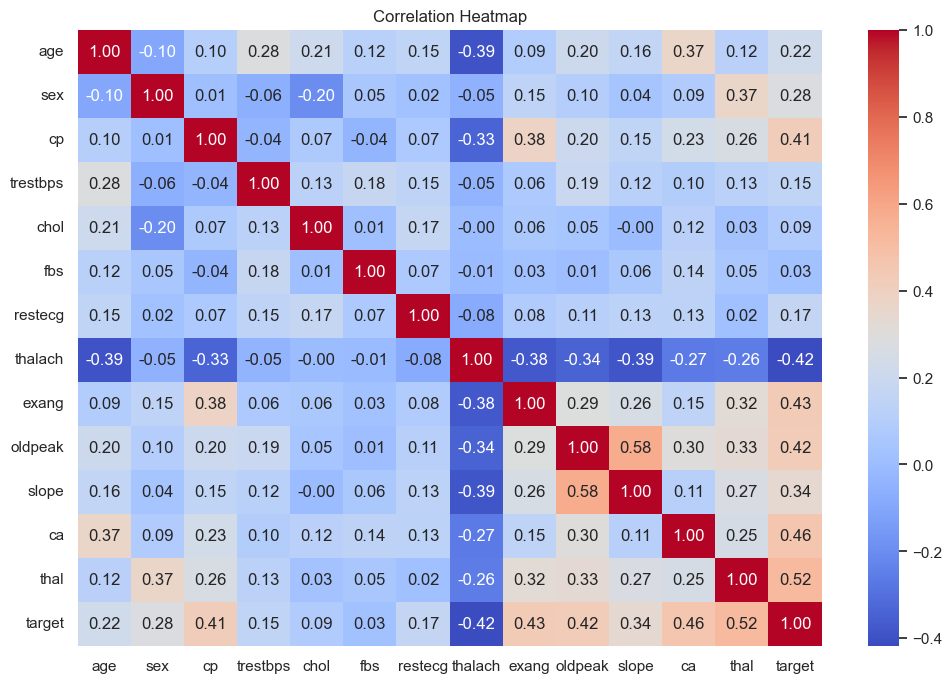

In [80]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()



/var/folders/9n/xcvgzg393650ht1tb8d5p0wh0000gn/T/ipykernel_922/1186287243.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importance", y="feature", data=feature_importance, palette="viridis")


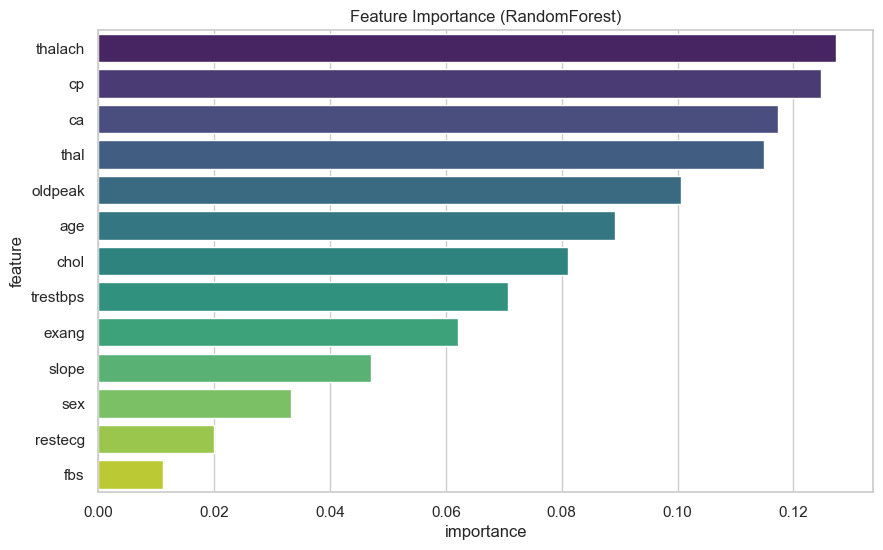

In [81]:
from sklearn.ensemble import RandomForestClassifier

X = df.drop("target", axis=1)
y = df["target"]

model = RandomForestClassifier(random_state=42)
model.fit(X, y)

feature_importance = pd.DataFrame({
    "feature": X.columns,
    "importance": model.feature_importances_
}).sort_values(by="importance", ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x="importance", y="feature", data=feature_importance, palette="viridis")
plt.title("Feature Importance (RandomForest)")
plt.show()


In [82]:
import numpy as np

# Replace -9 with NaN
df.replace(-9, np.nan, inplace=True)

# Check missing values
print(df.isnull().sum())


age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


In [83]:
# Fill numeric NaNs with column mean
df.fillna(df.mean(numeric_only=True), inplace=True)


In [84]:
X = df.drop("target", axis=1)
y = df["target"]


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [86]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [87]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

categorical = ["cp", "thal", "slope"]
numeric = [col for col in df.columns if col not in categorical + ["target"]]

preprocessor = ColumnTransformer(
    transformers=[
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical),
        ("num", StandardScaler(), numeric)
    ]
)

pipeline = Pipeline([
    ("preprocessor", preprocessor),
    ("clf", RandomForestClassifier(n_estimators=200, random_state=42))
])

X = df.drop("target", axis=1)
y = df["target"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

pipeline.fit(X_train, y_train)
joblib.dump(pipeline, "pipeline.pkl")


['pipeline.pkl']

In [88]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predict on test data
y_pred = pipeline.predict(X_test)

# Evaluation metrics
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8852459016393442

Confusion Matrix:
 [[27  6]
 [ 1 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



In [89]:
import joblib
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Load the pipeline
loaded_pipeline = joblib.load("pipeline.pkl")

# Predict again on X_test
y_pred_loaded = loaded_pipeline.predict(X_test)

# Evaluation
print("Accuracy (reloaded):", accuracy_score(y_test, y_pred_loaded))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_loaded))
print("\nClassification Report:\n", classification_report(y_test, y_pred_loaded))


Accuracy (reloaded): 0.8852459016393442

Confusion Matrix:
 [[27  6]
 [ 1 27]]

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.82      0.89        33
           1       0.82      0.96      0.89        28

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.90      0.89      0.89        61



In [90]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define hyperparameter search space for RandomForest
param_dist = {
    "clf__n_estimators": randint(100, 500),      # number of trees
    "clf__max_depth": [None, 5, 10, 20],         # depth of trees
    "clf__min_samples_split": randint(2, 20),    # min samples per split
    "clf__min_samples_leaf": randint(1, 20),     # min samples per leaf
    "clf__max_features": ["sqrt", "log2", None]  # feature selection strategy
}

# Setup RandomizedSearchCV
random_search = RandomizedSearchCV(
    pipeline, 
    param_distributions=param_dist,
    n_iter=30,                  # number of random parameter sets to try
    cv=5,                       # 5-fold cross-validation
    scoring="accuracy",
    random_state=42,
    n_jobs=-1                   # use all cores for speed
)

# Fit on training set
random_search.fit(X_train, y_train)

# Best hyperparameters
print("Best Parameters:", random_search.best_params_)
print("Best CV Accuracy:", random_search.best_score_)


Best Parameters: {'clf__max_depth': 5, 'clf__max_features': 'sqrt', 'clf__min_samples_leaf': 7, 'clf__min_samples_split': 10, 'clf__n_estimators': 427}
Best CV Accuracy: 0.8220238095238097


In [91]:
from sklearn.pipeline import Pipeline
import joblib

# Assuming you have pipeline defined
# pipeline = Pipeline([...])

# Save it
joblib.dump(pipeline, "pipeline.pkl")


['pipeline.pkl']